In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [3]:

# Sample data
data = {
    'square_footage': [1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700],
    'bedrooms': [3, 3, 3, 4, 2, 3, 4, 4, 2, 3],
    'price': [245000, 312000, 279000, 308000, 199000, 219000, 405000, 324000, 319000, 255000]
}
df = pd.DataFrame(data)



In [5]:

# Define predictors and response
X = df[['square_footage', 'bedrooms']]
X = sm.add_constant(X)
y = df['price']

# Fit model
model = sm.OLS(y, X).fit()


In [6]:

# Calculate Cook's Distance
influence = model.get_influence()
cooks_d, p_values = influence.cooks_distance

# Print Cook's Distance values and identify influential points
for i, d in enumerate(cooks_d):
    print(f"Observation {i+1}: Cook's Distance = {d}")


Observation 1: Cook's Distance = 0.0028411784926598255
Observation 2: Cook's Distance = 0.04414145070094832
Observation 3: Cook's Distance = 0.0016494073504951042
Observation 4: Cook's Distance = 0.2064958178892097
Observation 5: Cook's Distance = 0.09794018719434762
Observation 6: Cook's Distance = 0.0689479364786967
Observation 7: Cook's Distance = 0.3535991472628419
Observation 8: Cook's Distance = 0.9157731285320397
Observation 9: Cook's Distance = 0.8660393712032831
Observation 10: Cook's Distance = 0.02533007167938092


In [7]:

# Identify points with Cook's Distance above 0.5
threshold = 0.5
influential_points = np.where(cooks_d > threshold)[0]
print(f"Influential points (Cook's Distance > {threshold}): {influential_points}")


Influential points (Cook's Distance > 0.5): [7 8]


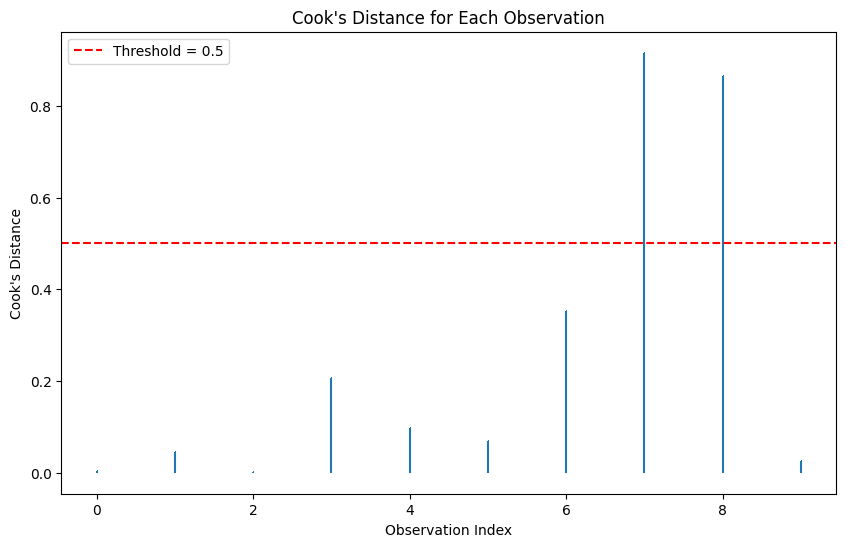

In [9]:
# Plot Cook's Distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Each Observation")
plt.axhline(y=0.5, color='r', linestyle='--', label="Threshold = 0.5")
plt.legend()
plt.show()
